In [5]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

In [8]:
# benches = ox.features_from_place('United Kingdom',
#                                  tags={'amenity':'bench'})

# export then re-import so don't have to run the above query again
# benches[['amenity','geometry',
#          'backrest','material','seats']].to_feather('unitedkingdom_amenitybench.feather')
benches = gpd.read_feather('unitedkingdom_amenitybench.feather')

benches = benches.to_crs(27700)
benches['geometry'] = benches.centroid # because some of them are polygons
print(f'there are {len(benches)} benches')

there are 111694 benches


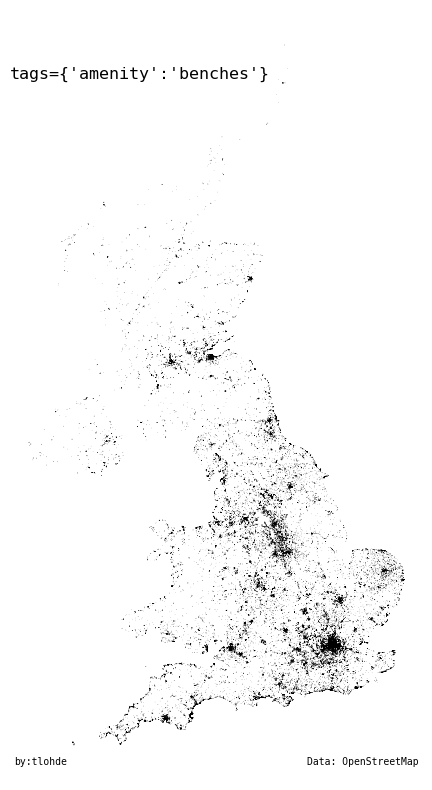

In [7]:
fig, ax = plt.subplots(figsize=[7,10])

benches.plot(markersize=0.1, ec='none', fc='k', alpha=0.8, ax=ax)

ax.set_axis_off()
ax.set_title("tags={'amenity':'benches'}", loc='left', y=0.9)

ax.annotate(text='Data: OpenStreetMap',
            xy=(0.99,0.02), 
            xycoords='axes fraction', 
            ha='right',
            fontsize=7)

ax.annotate(text='by:tlohde',
            xy=(0.01,0.02), 
            xycoords='axes fraction',
            ha='left',
            fontsize=7)

fig.savefig('day15.png', bbox_inches='tight', dpi=300)